In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file = open('files/ch03/adult.data', 'r')

def chr_int(a):
    if a.isdigit(): return int(a)
    else: return 0

data = []
for line in file:
    data1 = line.split(', ')
    if len(data1) == 15:
        data.append([chr_int(data1[0]), data1[1],
                     chr_int(data1[2]), data1[3],
                     chr_int(data1[4]), data1[5],
                     data1[6], data1[7], data1[8],
                     data1[9],chr_int(data1[10]),
                     chr_int(data1[11]),
                     chr_int(data1[12]),
                     data1[13], data1[14]
        ])
print(data[1:2])

[[50, 'Self-emp-not-inc', 83311, 'Bachelors', 13, 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', 0, 0, 13, 'United-States', '<=50K\n']]


In [4]:
df = pd.DataFrame(data)
df.columns = [
    'age', 'type_employer', 'fnlwgt',
    'education', 'education_num', 'marital',
    'occupation', ' relationship', 'race',
    'sex', 'capital_gain', 'capital_loss',
    'hr_per_week', 'country', 'income'
]
df.shape

(32561, 15)

In [5]:
counts = df.groupby('country').size()
print(counts)

country
?                               583
Cambodia                         19
Canada                          121
China                            75
Columbia                         59
Cuba                             95
Dominican-Republic               70
Ecuador                          28
El-Salvador                     106
England                          90
France                           29
Germany                         137
Greece                           29
Guatemala                        64
Haiti                            44
Holand-Netherlands                1
Honduras                         13
Hong                             20
Hungary                          13
India                           100
Iran                             43
Ireland                          24
Italy                            73
Jamaica                          81
Japan                            62
Laos                             18
Mexico                          643
Nicaragua           

In [6]:
ml = df[(df.sex == 'Male')]
ml_high_income = df[(df.sex == 'Male') & (df.income == '>50K\n')]

fm = df[(df.sex == 'Female')]
fm_high_income = df[(df.sex == 'Female') & (df.income == '>50K\n')]

In [7]:
df1 = df[(df.income == '>50K\n')]
print('The rate of people with high income is: ',
     int(len(df1)/float(len(df))*100), '%.')
print('The rate of men with high income is: ',
     int(len(ml_high_income)/float(len(ml))*100), '%.')
print('The rate of women with high income is: ',
     int(len(fm_high_income)/float(len(fm))*100), '%.')

The rate of people with high income is:  24 %.
The rate of men with high income is:  30 %.
The rate of women with high income is:  10 %.


In [8]:
print('The average age of men is: ',
     ml['age'].mean())
print('The average age of women is: ',
     fm['age'].mean())

print('The average age of high-income men is: ',
     ml_high_income['age'].mean())
print('The average age of high-income women is: ',
     fm_high_income['age'].mean())

The average age of men is:  39.43354749885268
The average age of women is:  36.85823043357163
The average age of high-income men is:  44.62578805163614
The average age of high-income women is:  42.125530110262936


In [9]:
ml_mu = ml['age'].mean()
fm_mu = fm['age'].mean()
ml_var = ml['age'].var()
fm_var = fm['age'].var()
ml_std = ml['age'].std()
fm_std = fm['age'].std()

print('Statistis of age for men: mu:',
     ml_mu, ' var:', ml_var, ' std:', ml_std)
print('Statistcs of age for women: mu:',
     fm_mu, ' var:', fm_var, ' std:', fm_std)

Statistis of age for men: mu: 39.43354749885268  var: 178.77375174530096  std: 13.37063019252649
Statistcs of age for women: mu: 36.85823043357163  var: 196.3837063948037  std: 14.01369709943824


In [10]:
ml_median = ml['age'].median()
fm_median = fm['age'].median()
print('Median age per men and women: ',
     ml_median, fm_median)

ml_median_age = ml_high_income['age'].median()
fm_median_age = fm_high_income['age'].median()
print('Median age per men and women with high income: ',
     ml_median_age, fm_median_age)

Median age per men and women:  38.0 35.0
Median age per men and women with high income:  44.0 41.0


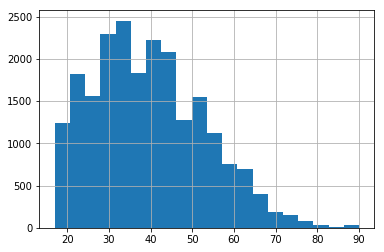

In [11]:
ml_age = ml['age']
ml_age.hist(density = 0, histtype = 'stepfilled', bins = 20)

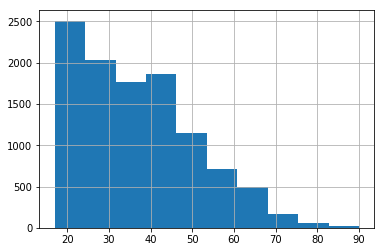

In [12]:
fm_age = fm['age']
fm_age.hist(density = 0, histtype = 'stepfilled', bins = 10)

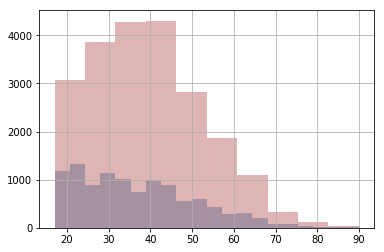

In [13]:
import seaborn as sns
fm_age.hist(density = 0, histtype = 'stepfilled',
           alpha = .5, bins = 20)
ml_age.hist(density = 0, histtype = 'stepfilled',
           alpha = .5,
           color = sns.desaturate('indianred',
                                 .75),
           bins = 10)

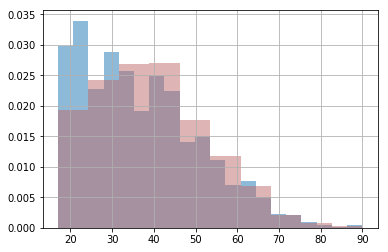

In [14]:
fm_age.hist(density = 1, histtype = 'stepfilled',
           alpha = .5, bins = 20)
ml_age.hist(density = 1, histtype = 'stepfilled',
           alpha = .5,
           color = sns.desaturate('indianred',
                                 .75),
           bins = 10)

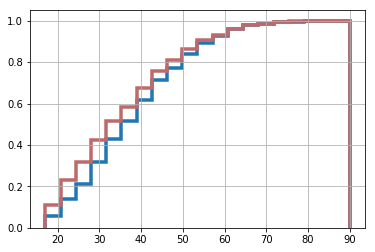

In [15]:
ml_age.hist(density = 1, histtype = 'step',
           cumulative = True, linewidth = 3.5,
           bins = 20)
fm_age.hist(density = 1, histtype = 'step',
           cumulative = True, linewidth = 3.5,
           bins = 20,
           color = sns.desaturate('indianred', .75))

In [16]:
df2 = df.drop(df.index[
    (df.income == '>50K\n') &
    (df['age'] > df['age'].median() + 35) &
    (df['age'] > df['age'].median() -15)
])

ml1_age = ml_high_income['age']
fm1_age = fm_high_income['age']

ml2_age = ml1_age.drop(ml1_age.index[
    (ml1_age > df['age'].median() + 35) &
    (ml1_age > df['age'].median() - 15)
])

fm2_age = fm1_age.drop(fm1_age.index[
    (fm1_age > df['age'].median() + 35) &
    (fm1_age > df['age'].median() - 15)
])

In [17]:
mu2ml = ml2_age.mean()
std2ml = ml2_age.std()
md2ml = ml2_age.median()
mu2fm = fm2_age.mean()
std2fm = fm2_age.std()
md2fm = fm2_age.median()

print('Men statistics: ')
print('Mean: ',mu2ml, 'Std: ', std2ml)
print('Median: ', md2ml)
print('Min: ', ml2_age.min(), 'Max: ', ml2_age.max())
print('-------------------------------')
print('Women statistics: ')
print('Mean: ',mu2fm, 'Std: ', std2fm)
print('Median: ', md2fm)
print('Min: ', fm2_age.min(), 'Max: ', fm2_age.max())

Men statistics: 
Mean:  44.317982123920615 Std:  10.019749857171412
Median:  44.0
Min:  19 Max:  72
-------------------------------
Women statistics: 
Mean:  41.877028181041844 Std:  10.036441807343714
Median:  41.0
Min:  19 Max:  72


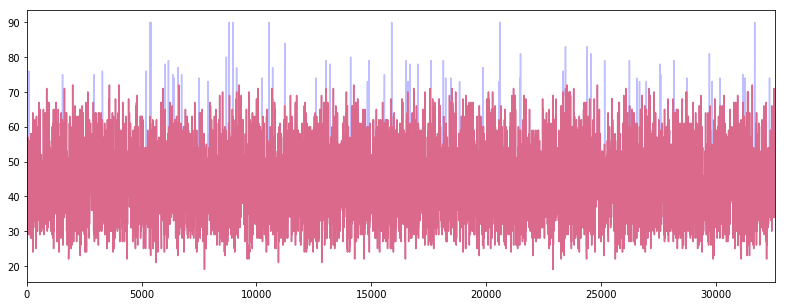

In [18]:
plt.figure(figsize=(13.4, 5))
df.age[(df.income == '>50K\n')].plot(alpha = .25, color='blue')
df2.age[(df2.income == '>50K\n')].plot(alpha = .45, color='red')

In [19]:
def skewness(x):
    res = 0
    m = x.mean()
    s = x.std()
    for i in x:
        res += (i-m) * (i-m) * (i-m)
    res /= (len(x) * s * s * s)
    return res

print("Skewness of te male population = ", skewness(ml2_age))
print("Skewness of te female population = ", skewness(fm2_age))

Skewness of te male population =  0.2664443838432819
Skewness of te female population =  0.38633352491285977


In [20]:
def pearson(x):
    return 3*(x.mean() - x.median())*x.std()

print('Pearson´s coefficient of the male population = ', pearson(ml2_age))
print('Pearson´s coefficient of the female population = ', pearson(fm2_age))

Pearson´s coefficient of the male population =  9.55830402220993
Pearson´s coefficient of the female population =  26.40672690728092


Kernel density estimation handmade


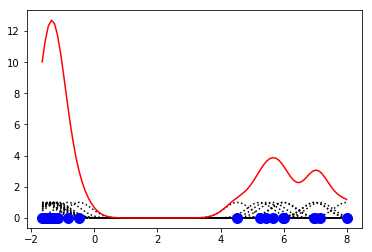

In [27]:
print('Kernel density estimation handmade')
import scipy

x1 = np.random.normal(-1, 0.5, 15)
x2 = np.random.normal(6, 1, 10)

y = np.r_[x1, x2]
# r_ translates slice objects to concatenation along the first axis.
x = np.linspace(min(y), max(y), 100)

s = 0.4 # Smoothing parameter

# Calculate the kernels
kernels = np.transpose([scipy.stats.norm.pdf(x, yi, s) for yi in y])
plt.plot(x, kernels, 'k:')
plt.plot(x, kernels.sum(1), 'r')
plt.plot(y, np.zeros(len(y)), 'bo', ms = 10)

Kernel density estimation Scipy implementation


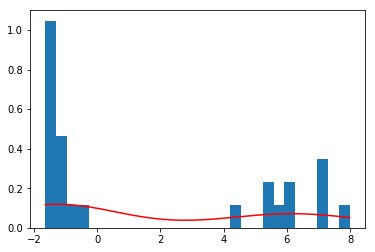

In [28]:
from scipy.stats import kde
print('Kernel density estimation Scipy implementation')
density = kde.gaussian_kde(y)
xgrid = np.linspace(x.min(), x.max(), 200)
plt.hist(y, bins = 28, density = True)
plt.plot(xgrid , density(xgrid), 'r-')